## Import Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivaamaliasetiawan","key":"1b0d8e6b2406dba7a0f1dabbeb81d99d"}'}

In [ ]:
# Membuat direktori .kaggle di dalam direktori home.
# Opsi -p memastikan bahwa tidak akan ada kesalahan jika direktori sudah ada.
!mkdir -p ~/.kaggle

# Menyalin file kaggle.json ke dalam direktori .kaggle
!cp kaggle.json ~/.kaggle/

# Mengubah izin file kaggle.json sehingga hanya pemilik file yang bisa membacanya dan menulisnya.
!chmod 600 ~/.kaggle/kaggle.json

# Menampilkan daftar isi dari direktori .kaggle untuk memastikan bahwa file kaggle.json telah berhasil disalin
!ls ~/.kaggle

kaggle.json


In [ ]:
# Mengunduh dataset
!kaggle datasets download -d fedesoriano/heart-failure-prediction

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 21.2MB/s]


In [ ]:
# Membuat direktori baru bernama heart-failure-prediction.
!mkdir heart-failure-prediction

# Mengekstrak dari file heart-failure-prediction.zip ke dalam direktori heart-failure-prediction
!unzip heart-failure-prediction.zip -d heart-failure-prediction

# Menampilkan daftar isi dari direktori heart-failure-prediction.
!ls heart-failure-prediction

Archive:  heart-failure-prediction.zip
  inflating: heart-failure-prediction/heart.csv  
heart.csv


## Import Library

In [ ]:
# Mengimpor library Pandas untuk manipulasi dan analisis data dalam bentuk DataFrame.
import pandas as pd
# Mengimpor library NumPy untuk operasi numerik dan array multidimensi.
import numpy as np
# Mengimpor modul pyplot dari library Matplotlib untuk membuat visualisasi data seperti grafik dan plot.
import matplotlib.pyplot as plt
# Mengimpor library Seaborn untuk membuat visualisasi data yang lebih kompleks dan menarik.
import seaborn as sns

# Mengimpor fungsi train_test_split dari Scikit-learn untuk membagi dataset menjadi set pelatihan (training set) dan set pengujian (testing set).
from sklearn.model_selection import train_test_split

# Mengimpor library TensorFlow untuk pembelajaran mesin.
import tensorflow as tf
# Mengimpor fungsi plot_model untuk memvisualisasikan arsitektur model.
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, Activation
# Mengimpor kelas Sequential untuk membangun model lapisan bertumpuk secara berurutan.
from tensorflow.keras import Sequential
# Mengimpor optimizer Adam adalah algoritma optimasi yang digunakan untuk memperbarui bobot model berdasarkan data pelatihan.
from tensorflow.keras.optimizers import Adam

## Import Dataset

In [ ]:
# Data yang dibaca dari file CSV kemudian disimpan ke dalam DataFrame
df = pd.read_csv("heart-failure-prediction/heart.csv")

In [ ]:
# Menampilkan lima baris pertama dari DataFrame
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Menampilkan informasi ringkas tentang dataset, Meliputi jumlah total baris, nama kolom, tipe data setiap kolom, jumlah non-null dan ukuran memori.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Memberikan jumlah nilai null (NaN) di setiap kolom.
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# Mengidentifikasi data yang duplikat
overall_duplicates = df[df.duplicated()]
print("Duplikat Keseluruhan:")
print(overall_duplicates)

Duplikat Keseluruhan:
Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


In [ ]:
# Menghapus duplikat dan mengganti DataFrame yang ada
df.drop_duplicates(inplace=True)

# Menampilkan DataFrame setelah menghapus duplikat
print("DataFrame setelah menghapus duplikat:")
print(df)

DataFrame setelah menghapus duplikat:
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  Hear

In [ ]:
# Untuk mengatur ulang indeks DataFrame df dan menghapus indeks lama.
df = df.reset_index(drop=True)

## Transform Data

In [ ]:
# Mengelompokkan kolom-kolom dalam DataFrame menjadi dua kategori berdasarkan tipe datanya (numerik dan kategorikal)
numerical = []
catgcols =[]

for col in df.columns:
    if df[col].dtype=="float64":
      numerical.append(col)
    else:
        catgcols.append(col)

# digunakan untuk mengisi nilai yang hilang dalam setiap kolom DataFrame
for col in df.columns:
  if col in numerical:
    df[col].fillna(df[col].median(), inplace=True)
  else:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
# Menampilkan nilai numerik
numerical

['Oldpeak']

In [ ]:
# Menampilkan nilai kategori
catgcols

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease']

In [ ]:
# Untuk mengubah nilai-nilai dalam kolom-kolom kategorikal (catgcols) menjadi nilai numerik
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in catgcols:
  df[col] = le.fit_transform(df[col])

In [ ]:
# Menampilkan data
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,0.0,2,0
1,21,0,2,55,40,0,1,82,0,1.0,1,1
2,9,1,1,31,141,0,2,25,0,0.0,2,0
3,20,0,0,39,72,0,1,34,1,1.5,1,1
4,26,1,2,49,53,0,1,48,0,0.0,2,0


In [ ]:
# Untuk mengidentifikasi kolom independen (fitur) dan kolom dependen (target)
ind_col = [col for col in df.columns if col != 'HeartDisease']
dep_col = 'HeartDisease'

In [ ]:
# Menampilkan jumlah ouput pada data HeartDisease
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [ ]:
# # Memisahkan data menjadi fitur dan target.
x = df[ind_col]
y = df[dep_col]

In [ ]:
# Membagi data menjadi data training dan data testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=80, stratify=y)

print('train shape:', x_train.shape)
print('test shape:', x_test.shape)

train shape: (642, 11)
test shape: (276, 11)


In [ ]:
model = Sequential()

model.add(Dense(8, activation='relu', input_dim=x.shape[-1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
# Menampilkan ringkasan
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 274 (1.07 KB)
Trainable params: 274 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


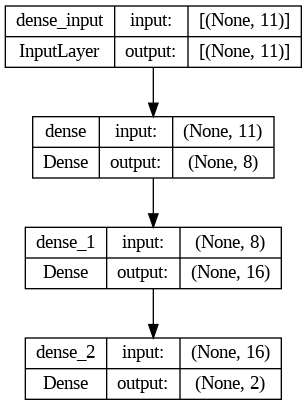

In [ ]:
# Menampilkan diagram visual dari arsitektur model
plot_model(model, show_shapes = True)

In [ ]:
# Mengonfigurasi optimizer
optim = Adam(lr=0.001)
# Mengompilasi model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

# Menentukan ukuran batch
batch_size=1
# Menentukan jumlah epoch
epochs = 15

# Melatih model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)

Epoch 1/15
577/577 [==============================] - 6s 5ms/step - loss: 1.7556 - acc: 0.5165 - val_loss: 0.6073 - val_acc: 0.6308
Epoch 2/15
577/577 [==============================] - 2s 3ms/step - loss: 0.6945 - acc: 0.6447 - val_loss: 0.4636 - val_acc: 0.8462
Epoch 3/15
577/577 [==============================] - 2s 3ms/step - loss: 0.6482 - acc: 0.6655 - val_loss: 0.4261 - val_acc: 0.7846
Epoch 4/15
577/577 [==============================] - 2s 3ms/step - loss: 0.5917 - acc: 0.6898 - val_loss: 0.4184 - val_acc: 0.8462
Epoch 5/15
577/577 [==============================] - 2s 3ms/step - loss: 0.6018 - acc: 0.7244 - val_loss: 0.4495 - val_acc: 0.8308
Epoch 6/15
577/577 [==============================] - 2s 3ms/step - loss: 0.5392 - acc: 0.7279 - val_loss: 0.4094 - val_acc: 0.7846
Epoch 7/15
577/577 [==============================] - 2s 3ms/step - loss: 0.5468 - acc: 0.7747 - val_loss: 0.4275 - val_acc: 0.8000
Epoch 8/15
577/577 [==============================] - 2s 4ms/step - loss: 0.

In [ ]:
# Melakukan nilai akurasi
from sklearn.metrics import accuracy_score
pred = np.argmax(model.predict(x_test), axis=1)
print(accuracy_score(y_test, pred))

9/9 [==============================] - 0s 2ms/step
0.7789855072463768


In [ ]:
# Mengevaluasi kinerja model yang sudah dilatih menggunakan data uji
model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.5134 - acc: 0.7790


[0.5133528113365173, 0.7789855003356934]

In [ ]:
# melakukan prediksi menggunakan model yang sudah dilatih terhadap satu contoh data baru.
prediction = model.predict([[12, 1,	1,	41,	147,	0,	1,	98,	0,	0.0,	2]])
print(prediction)

1/1 [==============================] - 0s 66ms/step
[[0.9918978  0.00810219]]


In [ ]:
# Melakukan prediksi kategori pasien berdasarkan fitur yang diberikan, lalu menentukan status pasien berdasarkan prediksi pasien terkena gagal jantung atau normal.
prediction = model.predict([[9,	1, 1,	31,	141,	0,	2,	25,	0,	0.0,	2	]])

predicted_class = np.argmax(prediction, axis=-1)

if predicted_class == 1:
    print('Pasien Terkena Gagal Jantung')
else:
    print('Pasien Normal')

1/1 [==============================] - 0s 28ms/step
Pasien Normal


In [ ]:
# Melakukan prediksi kategori pasien berdasarkan fitur yang diberikan, lalu menentukan status pasien berdasarkan prediksi pasien terkena gagal jantung atau normal.
prediction = model.predict([[20,	0,	0,	39,	72,	0,	1,	34,	1,	1.5,	1	]])

predicted_class = np.argmax(prediction, axis=-1)

if predicted_class == 1:
    print('Pasien Terkena Gagal Jantung')
else:
    print('Pasien Normal')

1/1 [==============================] - 0s 28ms/step
Pasien Terkena Gagal Jantung


## Save Model

In [ ]:
model.save('./heart_failure.hs')

In [ ]:
model = tf.keras.models.load_model('./heart_failure.hs')
converter =tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./heart_failure.tflite", "wb").write(tflite_model)

3192